# **Le classificateur convolutif**
Créez votre premier modèle de vision par ordinateur avec **Keras**.
 
Bienvenue dans le monde de la **Vision par Ordinateur** !  
Avez-vous déjà voulu apprendre à un ordinateur à voir ? Dans ce cours, c'est exactement ce que vous ferez !

Dans ce cours, vous allez :

- Utiliser des réseaux de deep learning modernes pour construire un **classificateur d'images avec Keras**.
- Concevoir votre propre réseau convolutif personnalisé avec des blocs réutilisables.
- Apprendre les idées fondamentales derrière l'**extraction de caractéristiques visuelles**.
- Maîtriser l'**art du transfert learning** pour améliorer vos modèles.
- Utiliser l'augmentation de données pour étendre votre jeu de données.

Si vous avez suivi le cours d'introduction au deep learning, vous avez déjà toutes les connaissances nécessaires pour réussir.

Alors, commençons !

---

## Introduction  
Ce cours vous présentera les **idées fondamentales de la vision par ordinateur**. Notre objectif est de comprendre comment un réseau neuronal peut "*comprendre*" une image naturelle suffisamment bien pour résoudre les mêmes types de problèmes que le système visuel humain peut résoudre.

Les réseaux neuronaux les plus performants pour cette tâche sont appelés **réseaux de neurones convolutifs** (parfois appelés **convnet ou CNN**). **La convolution** est l'opération mathématique qui donne aux couches d'un convnet leur structure unique. Dans les leçons futures, vous apprendrez pourquoi cette structure est si efficace pour résoudre les problèmes de vision par ordinateur.

Nous appliquerons ces idées au problème de la classification d'images : étant donné une image, pouvons-nous entraîner un ordinateur à nous dire de quoi il s'agit ? Vous avez peut-être déjà vu des applications capables d'identifier une espèce de plante à partir d'une photographie. C'est un classificateur d'images ! Dans ce cours, vous apprendrez à construire des classificateurs d'images aussi puissants que ceux utilisés dans les applications professionnelles.

Bien que notre focus soit sur la classification d'images, ce que vous apprendrez dans ce cours est pertinent pour tous les types de problèmes de vision par ordinateur. À la fin, vous serez prêt à passer à des applications plus avancées comme les **réseaux antagonistes génératifs (GAN)** et la **segmentation d'images**.

---

## Le Classificateur Convolutif  
Un convnet utilisé pour la classification d'images se compose de deux parties : **une base convolutive et une tête dense.**

- **Les parties d'un convnet** : image, base, tête, classe ; entrée, extraction, classification, sortie.

**La base** est utilisée pour extraire les caractéristiques d'une image. Elle est principalement constituée de couches effectuant l'opération de convolution, mais elle inclut souvent d'autres types de couches également. (Vous en apprendrez plus à ce sujet dans la prochaine leçon.)

**La tête** est utilisée pour déterminer la classe de l'image. Elle est principalement constituée de couches denses, mais peut inclure d'autres couches comme le dropout.

Que voulons-nous dire par **caractéristique visuelle** ? Une caractéristique pourrait être une ligne, une couleur, une texture, une forme, un motif — ou une combinaison complexe de ces éléments.

Le processus global ressemble à ceci :

L'idée de l'extraction de caractéristiques.  
Les caractéristiques réellement extraites sont un peu différentes, mais cela donne une idée.

---

## Entraînement du Classificateur
L'objectif du réseau pendant l'entraînement est d'apprendre deux choses :

1. Quelles caractéristiques extraire d'une image (**base**).
2. Quelle classe correspond à quelles caractéristiques (**tête**).

Aujourd'hui, les **convnets** sont rarement entraînés à partir de zéro. Plus souvent, nous réutilisons la base d'un modèle pré-entraîné. À cette base pré-entraînée, nous attachons ensuite une tête non entraînée. En d'autres termes, nous réutilisons la partie du réseau qui a déjà appris à extraire des caractéristiques, et nous y attachons de nouvelles couches pour apprendre à classer.

Attacher une nouvelle tête à une base entraînée.  
Comme la tête est généralement constituée de seulement quelques couches denses, des classificateurs très précis peuvent être créés à partir de relativement peu de données.

La réutilisation d'un modèle pré-entraîné est une technique connue sous le nom de **transfert learning**. Elle est si efficace que presque tous les classificateurs d'images aujourd'hui l'utilisent.

---

# **Exemple - Entraîner un Classificateur Convolutif**  
Tout au long de ce cours, nous allons créer des classificateurs qui tentent de résoudre le problème suivant : cette image représente-t-elle une Voiture ou un Camion ? Notre jeu de données contient environ 10 000 images de divers automobiles, à peu près moitié voitures et moitié camions.

## **Étape 1 - Charger les Données**  
La cellule  suivante importera quelques bibliothèques et configurera notre pipeline de données. Nous avons un ensemble d'entraînement appelé *ds_train* et un ensemble de validation appelé *ds_valid*.


**Décompressez le dataset** :

In [7]:
import zipfile
with zipfile.ZipFile('car-or-truck.zip', 'r') as zip_ref:
    zip_ref.extractall('car-or-truck')

In [9]:
# Imports des bibliothèques nécessaires
import os, warnings  # Pour gérer les fichiers et les avertissements
import matplotlib.pyplot as plt  # Pour la visualisation des données
from matplotlib import gridspec  # Pour créer des grilles de graphiques

import numpy as np  # Pour les opérations numériques
import tensorflow as tf  # Pour le deep learning
from tensorflow.keras.preprocessing import image_dataset_from_directory  # Pour charger des images depuis un répertoire

# Reproductibilité : fonction pour fixer les graines aléatoires
def set_seed(seed=31415):
    np.random.seed(seed)  # Fixe la graine pour NumPy
    tf.random.set_seed(seed)  # Fixe la graine pour TensorFlow
    os.environ['PYTHONHASHSEED'] = str(seed)  # Fixe la graine pour Python
    os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Rend les opérations TensorFlow déterministes
set_seed(31415)  # Appel de la fonction pour fixer les graines

# Définir les paramètres par défaut de Matplotlib pour une meilleure visualisation
plt.rc('figure', autolayout=True)  # Active la mise en page automatique des figures
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)  # Style des axes et des titres
plt.rc('image', cmap='magma')  # Définit la colormap par défaut pour les images
warnings.filterwarnings("ignore")  # Ignore les avertissements pour un affichage plus propre

**Charger les données dans votre notebook**

In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Charger les ensembles d'entraînement et de validation depuis un répertoire local
ds_train_ = image_dataset_from_directory(
    'car-or-truck/train',  # Chemin vers le dossier d'entraînement
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'car-or-truck/valid',  # Chemin vers le dossier de validation
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Afficher quelques informations sur les données
print("Nombre d'images d'entraînement :", len(ds_train_))
print("Nombre d'images de validation :", len(ds_valid_))

Found 5088 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.
Nombre d'images d'entraînement : 80
Nombre d'images de validation : 79


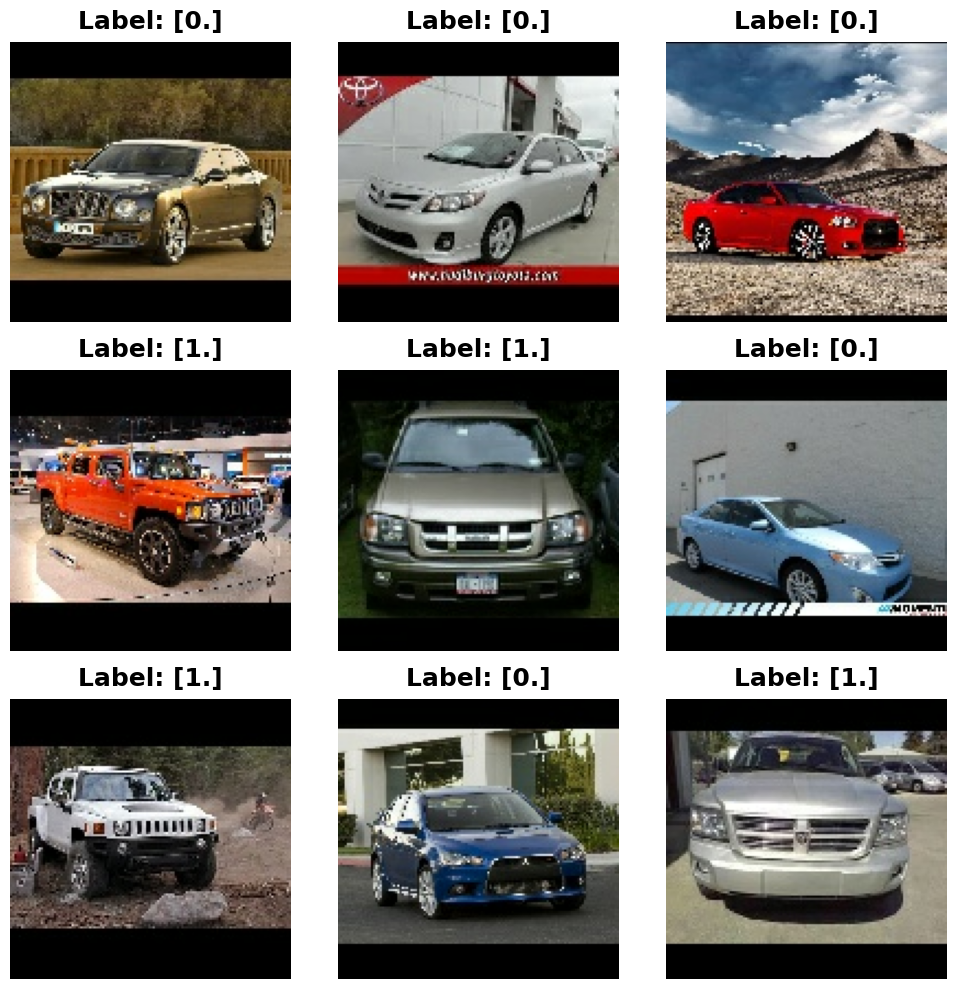

In [21]:
import matplotlib.pyplot as plt

for images, labels in ds_train_.take(1):  # Prend un batch de données
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Affiche 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

In [23]:
# Pipeline de données : fonction pour convertir les images en float32
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Convertit les pixels en float32
    return image, label  # Retourne l'image et le label

# Optimisation du pipeline de données avec AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE  # Permet à TensorFlow de choisir automatiquement les paramètres optimaux

# Application du pipeline de données à l'ensemble d'entraînement
ds_train = (
    ds_train_
    .map(convert_to_float)  # Convertit les images en float32
    .cache()  # Cache les données en mémoire pour accélérer l'entraînement
    .prefetch(buffer_size=AUTOTUNE)  # Prépare les données en avance pour éviter les goulots d'étranglement
)

# Application du pipeline de données à l'ensemble de validation
ds_valid = (
    ds_valid_
    .map(convert_to_float)  # Convertit les images en float32
    .cache()  # Cache les données en mémoire pour accélérer la validation
    .prefetch(buffer_size=AUTOTUNE)  # Prépare les données en avance pour éviter les goulots d'étranglement
)

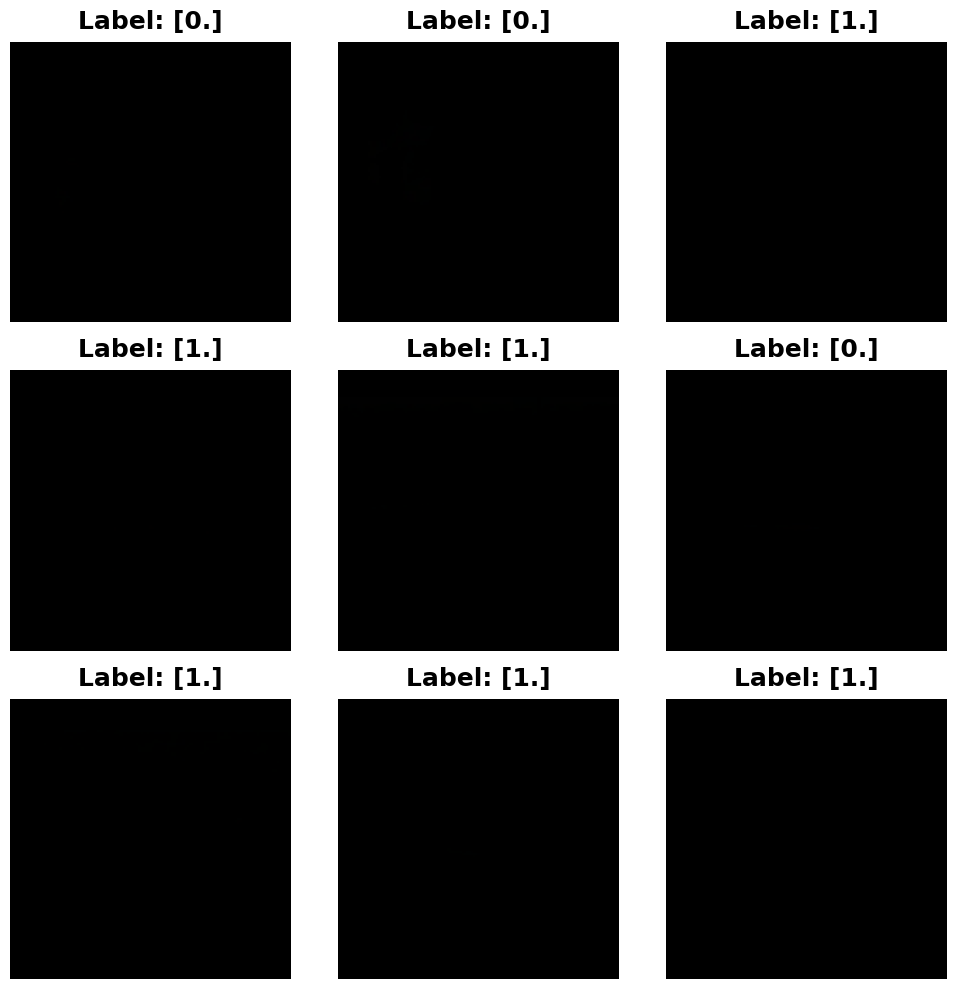

In [25]:
import matplotlib.pyplot as plt

for images, labels in ds_train.take(1):  # Prend un batch de données
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Affiche 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

---

## **Étape 2 - Définir la Base Pré-entraînée**  
Le jeu de données le plus couramment utilisé pour le pré-entraînement est **ImageNet**, un grand ensemble de données contenant de nombreux types d'images naturelles. **Keras** inclut une variété de modèles pré-entraînés sur ImageNet dans son module d'applications. Le modèle pré-entraîné que nous utiliserons s'appelle **VGG16**.

In [28]:
from tensorflow.keras.applications import VGG16

# Charger VGG16 pré-entraîné sur ImageNet (par defaut)
pretrained_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
pretrained_base.trainable = False

---
## **Étape 3 - Attacher la Tête**  
Ensuite, nous attachons la tête de classification. Pour cet exemple, nous utiliserons une **couche d'unités cachées** (la première couche Dense) suivie d'une couche pour transformer les sorties en un **score de probabilité** pour la classe 1, *Camion*. La couche **Flatten** transforme les sorties bidimensionnelles de la base en entrées unidimensionnelles nécessaires pour la tête.


In [31]:
from tensorflow import keras
from tensorflow.keras import layers

# Modèle avec base VGG16 et tête personnalisée
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalisation des pixels
    pretrained_base,  # Base VGG16 pré-entraînée
    layers.Flatten(),  # Aplatir les sorties de la base
    layers.Dense(128, activation='relu'),  # Couche dense avec 128 unités
    layers.Dropout(0.5),  # Dropout pour réduire le sur-ajustement
    layers.Dense(1, activation='sigmoid')  # Couche de sortie pour classification binaire
])

# Afficher un résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

---

## **Étape 4 : Compiler le modèle**  
Avant l'entraînement, vous devez compiler le modèle en spécifiant :
- **Optimiseur** : **Adam** est un bon choix par défaut.
- **Fonction de perte** : binary_crossentropy pour une classification binaire.
- **Métrique** : binary_accuracy pour surveiller la précision.

In [34]:
model.compile(
    optimizer='adam',  # Optimiseur Adam
    loss='binary_crossentropy',  # Fonction de perte pour classification binaire
    metrics=['binary_accuracy'],  # Métrique pour évaluer la précision
)

---
## **Étape 5 : Entraîner le modèle**
Utilisez la méthode **fit()** pour entraîner le modèle sur vos données d'entraînement (ds_train) et valider sur vos données de validation (ds_valid).


In [37]:
# Entraînement du modèle
history = model.fit(
    ds_train,  # Données d'entraînement
    validation_data=ds_valid,  # Données de validation
    epochs=10,  # Nombre d'époques (commencez avec 10)
    verbose=1,  # Afficher la progression
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 533s 7s/step - binary_accuracy: 0.5282 - loss: 0.8152 - val_binary_accuracy: 0.5785 - val_loss: 0.6832
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 537s 7s/step - binary_accuracy: 0.5643 - loss: 0.6906 - val_binary_accuracy: 0.5785 - val_loss: 0.6845
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 515s 6s/step - binary_accuracy: 0.5643 - loss: 0.6906 - val_binary_accuracy: 0.5785 - val_loss: 0.6808
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 484s 6s/step - binary_accuracy: 0.5643 - loss: 0.6917 - val_binary_accuracy: 0.5785 - val_loss: 0.6860
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 476s 6s/step - binary_accuracy: 0.5643 - loss: 0.6871 - val_binary_accuracy: 0.5785 - val_loss: 0.6841
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 467s 6s/step - binary_accuracy: 0.5643 - loss: 0.6860 - val_binary_accuracy: 0.5785 - val_loss: 0.6829
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 467s 6s/step - binary_accuracy: 0.5643 - loss: 0.6853 - val_binary_accuracy: 0.5785 - val_loss: 0.6821
Epoch 8/10
80

---
## **Étape 6 : Visualiser les résultats**
Après l'entraînement, visualisez les courbes de perte et de précision pour évaluer les performances du modèle.

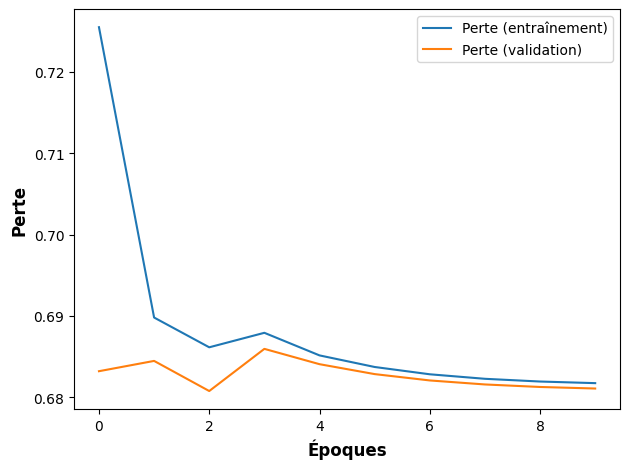

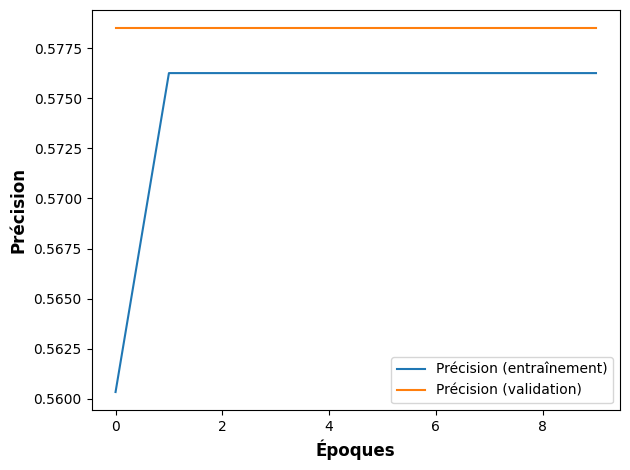

In [40]:
import matplotlib.pyplot as plt

# Afficher la perte
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Afficher la précision
plt.plot(history.history['binary_accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_binary_accuracy'], label='Précision (validation)')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [42]:
import tensorflow as tf
print("GPU disponible :", tf.config.list_physical_devices('GPU'))


GPU disponible : []







Lors de l'entraînement d'un réseau neuronal, il est toujours bon d'examiner les courbes de perte et de métrique. L'objet `history` contient ces informations dans un dictionnaire `history.history`. Nous pouvons utiliser Pandas pour convertir ce dictionnaire en un dataframe et le tracer avec une méthode intégrée.

```python
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
```

**Conclusion**  
Dans cette leçon, nous avons appris la structure d'un classificateur convolutif : une tête pour agir comme un classificateur au-dessus d'une base qui effectue l'extraction de caractéristiques.

La tête, essentiellement, est un classificateur ordinaire comme celui que vous avez appris dans le cours d'introduction. Pour les caractéristiques, elle utilise celles extraites par la base. C'est l'idée de base derrière les classificateurs convolutifs : nous pouvons attacher une unité qui effectue l'ingénierie des caractéristiques au classificateur lui-même.

C'est l'un des grands avantages des réseaux de neurones profonds par rapport aux modèles d'apprentissage automatique traditionnels : avec la bonne structure de réseau, le réseau de neurones profond peut apprendre à ingénier les caractéristiques dont il a besoin pour résoudre son problème.

Pour les prochaines leçons, nous examinerons comment la base convolutive réalise l'extraction de caractéristiques. Ensuite, vous apprendrez à appliquer ces idées et à concevoir vos propres classificateurs.

**À vous de jouer !**  
Pour l'instant, passez à l'exercice et construisez votre propre classificateur d'images !

Vous avez des questions ou des commentaires ? Visitez le forum de discussion du cours pour discuter avec d'autres apprenants.